In [112]:
import pandas as pd
df = pd.read_csv("cleaned_housing.csv")

In [113]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define IQR-based caps
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values (replace extreme values with the nearest non-outlier)
houses_clean = df.clip(lower_bound, upper_bound, axis=1)
outliers_clean = ((houses_clean < (Q1 - 1.5 * IQR)) | (houses_clean > (Q3 + 1.5 * IQR)))
print(outliers_clean.sum())  # Now should be 0

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [114]:
df.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,28.633094,2248.161944,463.007879,1236.916850,433.744629,3.665796,191638.452112
std,12.591805,1116.599700,230.062592,622.883831,214.913174,1.465452,92956.134748
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,37.000000,2814.000000,579.000000,1557.000000,543.000000,4.548600,241300.000000
max,52.000000,5679.000000,1173.000000,3124.000000,1090.000000,8.014400,482200.000000


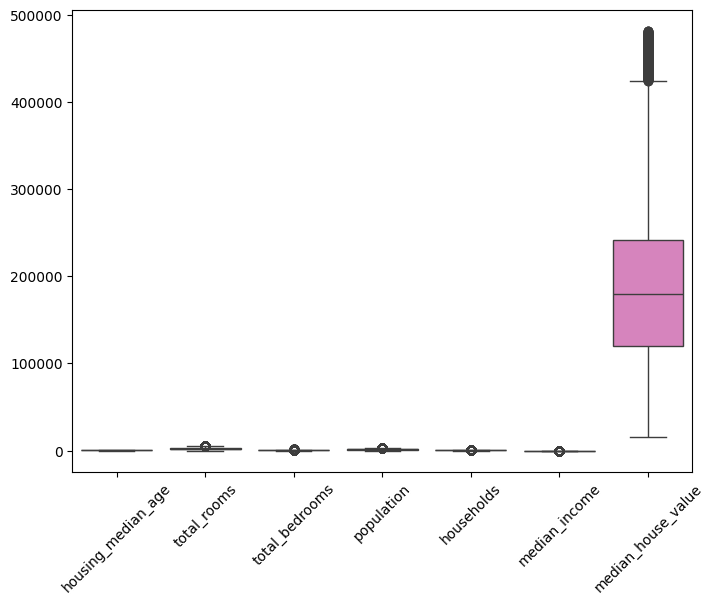

In [115]:
#looking for outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for all numeric columns
plt.figure(figsize=(8, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=45)
plt.show()

Splitting data Set

In [116]:
x = df.drop(columns=['median_house_value'])
y = df['median_house_value']    

In [117]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [118]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [119]:
lr_train_pred = lr.predict(x_train)
lr_test_pred = lr.predict(x_test)

Evaluation

In [120]:
from sklearn.metrics import mean_squared_error, r2_score
# Training set performance
train_mse = mean_squared_error(y_train, lr_train_pred)
train_r2 = r2_score(y_train, lr_train_pred)

# Testing set performance
test_mse = mean_squared_error(y_test, lr_test_pred)
test_r2 = r2_score(y_test, lr_test_pred)

In [121]:
# lr_results = pd.DataFrame({"Logical Regression": [train_mse, test_mse, train_r2, test_r2]},
#                           index=["Train MSE", "Test MSE", "Train R2", "Test R2"]).transpose()
# lr_results

lr_results = pd.DataFrame(['Linear Regression', train_mse, train_r2, test_mse, test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,5128648595.050102,0.408195,5117192873.876392,0.403503


Random Forest

In [122]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200,
    max_depth=10,
    min_samples_leaf=4,
    random_state=42)
rf.fit(x_train, y_train)

rf_train_pred = rf.predict(x_train)
rf_test_pred = rf.predict(x_test)

In [123]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(y_train, rf_train_pred)
rf_test_mse = mean_squared_error(y_test, rf_test_pred)

rf_train_r2 = r2_score(y_train, rf_train_pred)
r_test_r2 = r2_score(y_test, rf_test_pred)

In [124]:
import numpy as np

rmse = np.sqrt(rf_test_mse)
rmse

np.float64(65004.835115690476)

In [125]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, r_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,2951591974.821424,0.65941,4225628588.418105,0.507431


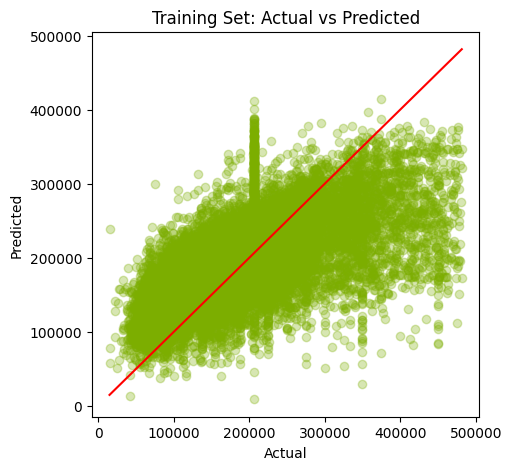

In [126]:
plt.figure(figsize=(5, 5))
plt.scatter(y_train, lr_train_pred, c="#7CAE00", alpha=0.3)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Training Set: Actual vs Predicted")
plt.show()



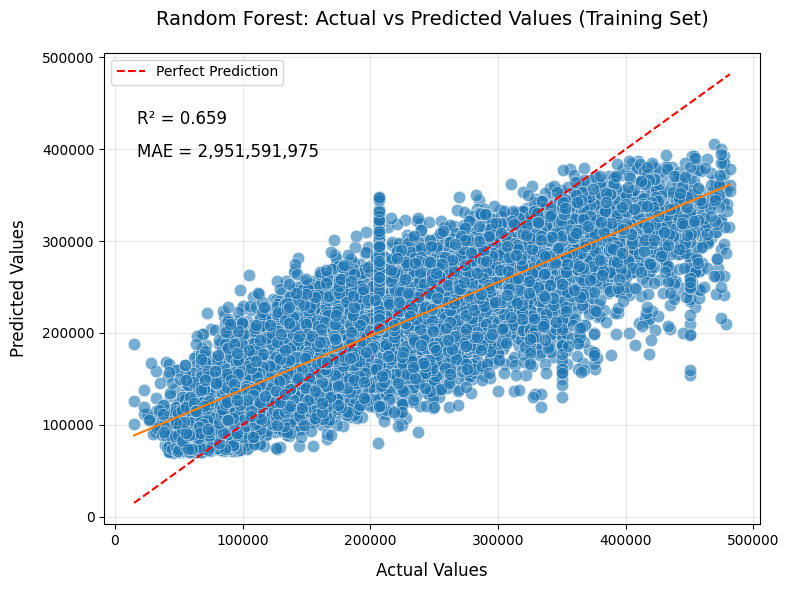

In [127]:
plt.figure(figsize=(8, 6))

# Scatter plot with enhanced styling
scatter = plt.scatter(y_train, rf_train_pred, c='#1f77b4', alpha=0.6, 
                     edgecolors='w', linewidth=0.5, s=80)

# Perfect prediction line (45-degree line)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 
         color='red', linestyle='--', linewidth=1.5, label='Perfect Prediction')

# Add a regression line to show trend
sns.regplot(x=y_train, y=rf_train_pred, scatter=False, 
            color='#ff7f0e', line_kws={'linewidth': 1.5})

# Formatting
plt.xlabel('Actual Values', fontsize=12, labelpad=10)
plt.ylabel('Predicted Values', fontsize=12, labelpad=10)
plt.title('Random Forest: Actual vs Predicted Values (Training Set)', 
          fontsize=14, pad=20)

# Add grid and adjust layout
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Add legend and statistics
plt.legend(fontsize=10)
plt.annotate(f'R² = {r2_score(y_train, rf_train_pred):.3f}', 
             xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12)
plt.annotate(f'MAE = {mean_squared_error(y_train, rf_train_pred):,.0f}', 
             xy=(0.05, 0.78), xycoords='axes fraction', fontsize=12)

plt.show()

In [128]:
import numpy as np

# Input features (must be 2D array)
input_sample = np.array([[52, 815, 87, 904, 88, 0.8668]])  # Shape: (1, 6)

# Predict
prediction = lr.predict(input_sample)  # Replace 'model' with your trained model
print(f"Predicted house value: ${prediction[0]:,.2f}")

Predicted house value: $79,199.74


c:\Users\Adnan\Desktop\ML\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [129]:
from sklearn.tree import DecisionTreeRegressor

# Create the model
dt = DecisionTreeRegressor(max_depth=10, random_state=42)
dt.fit(x_train, y_train)

dt_train_pred = dt.predict(x_train)
dt_test_pred = dt.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
dt_train_mse = mean_squared_error(y_train, dt_train_pred)
dt_test_mse = mean_squared_error(y_test, dt_test_pred)

dt_train_r2 = r2_score(y_train, dt_train_pred)
dt_test_r2 = r2_score(y_test, dt_test_pred)

In [130]:
dt_results = pd.DataFrame(['Decision Tree', dt_train_mse, dt_train_r2, dt_test_mse, dt_test_r2]).transpose()
dt_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
dt_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Decision Tree,3156942928.072483,0.635714,5427534700.500731,0.367328


In [131]:
df_models = pd.concat([lr_results, rf_results, dt_results], axis=0)
df_models = df_models.reset_index(drop=True)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,5128648595.050102,0.408195,5117192873.876392,0.403503
1,Random Forest,2951591974.821424,0.65941,4225628588.418105,0.507431
2,Decision Tree,3156942928.072483,0.635714,5427534700.500731,0.367328


In [132]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)
r_train_pred = dt.predict(x_train)
r_test_pred = dt.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
r_train_mse = mean_squared_error(y_train, r_train_pred)
r_test_mse = mean_squared_error(y_test, r_test_pred)

r_train_r2 = r2_score(y_train, r_train_pred)
r_test_r2 = r2_score(y_test, r_test_pred)

ridge_results = pd.DataFrame(['Ridge Regression', r_train_mse, r_train_r2, r_test_mse, r_test_r2]).transpose()
ridge_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
ridge_results


,Method,Training MSE,Training R2,Test MSE,Test R2
0,Ridge Regression,3156942928.072483,0.635714,5427534700.500731,0.367328


In [133]:
df_models = pd.concat([lr_results, rf_results, dt_results,ridge_results], axis=0)
df_models = df_models.reset_index(drop=True)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,5128648595.050102,0.408195,5117192873.876392,0.403503
1,Random Forest,2951591974.821424,0.65941,4225628588.418105,0.507431
2,Decision Tree,3156942928.072483,0.635714,5427534700.500731,0.367328
3,Ridge Regression,3156942928.072483,0.635714,5427534700.500731,0.367328


In [134]:
from sklearn.preprocessing import StandardScaler

# Create the scaler
scaler = StandardScaler()

# Fit only on training data
x_train_scaled = scaler.fit_transform(x_train)

# Use the same scaler to transform test data
x_test_scaled = scaler.transform(x_test)
from sklearn.linear_model import LinearRegression
# Create the model  
lr2 = LinearRegression()
# Fit the model on scaled training data
lr2.fit(x_train_scaled, y_train)
# Predict on scaled test data
lr2_test_pred = lr2.predict(x_test_scaled)
from sklearn.metrics import mean_squared_error, r2_score
# Training set performance
lr2_train_mse = mean_squared_error(y_train, lr2.predict(x_train_scaled))
lr2_train_r2 = r2_score(y_train, lr2.predict(x_train_scaled))
# Testing set performance
lr2_test_mse = mean_squared_error(y_test, lr2_test_pred)
lr2_test_r2 = r2_score(y_test, lr2_test_pred)

lr2_results = pd.DataFrame(['Scaled Linear Regression', lr2_train_mse, lr2_train_r2, lr2_test_mse, lr2_test_r2]).transpose()
lr2_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
lr2_results


,Method,Training MSE,Training R2,Test MSE,Test R2
0,Scaled Linear Regression,5128648595.050103,0.408195,5117192873.876391,0.403503


In [135]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Try degree 2 or 3
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(x_train, y_train)
poly_pred = poly_model.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score
poly_train_pred = poly_model.predict(x_train)
poly_train_mse = mean_squared_error(y_train, poly_train_pred)
poly_test_mse = mean_squared_error(y_test, poly_pred)
poly_test_r2 = r2_score(y_test, poly_pred)
poly_train_r2 = r2_score(y_train, poly_train_pred)
poly_results = pd.DataFrame(['Polynomial Regression', poly_train_mse, poly_train_r2, poly_test_mse, poly_test_r2]).transpose()
poly_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
poly_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Polynomial Regression,4803318285.104406,0.445735,4726294596.580084,0.449069
